# Blood Glucose Control - EDA

**Name:** Ike Yang



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
df50 = pd.read_csv("../data/gluroo_500030.csv")
df67 = pd.read_csv("../data/gluroo_679372.csv")
df50["pwd"] = "500030"
df67["pwd"] = "679372"
df = pd.concat([df50, df67])
df = df.drop(columns=["sender_id", "message_basal_change"])
ndt = [dt.strptime(x[:(-13 if len(x) == 32 else -6)], "%Y-%m-%d %H:%M:%S") for x in df["date"]]
df.insert(0, "date_fmt", ndt)
# Non-reading: %Y-%m-%d %H:%M:%S.%f-05:00
# Reading: %Y-%m-%d %H:%M:%S-05:00

### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

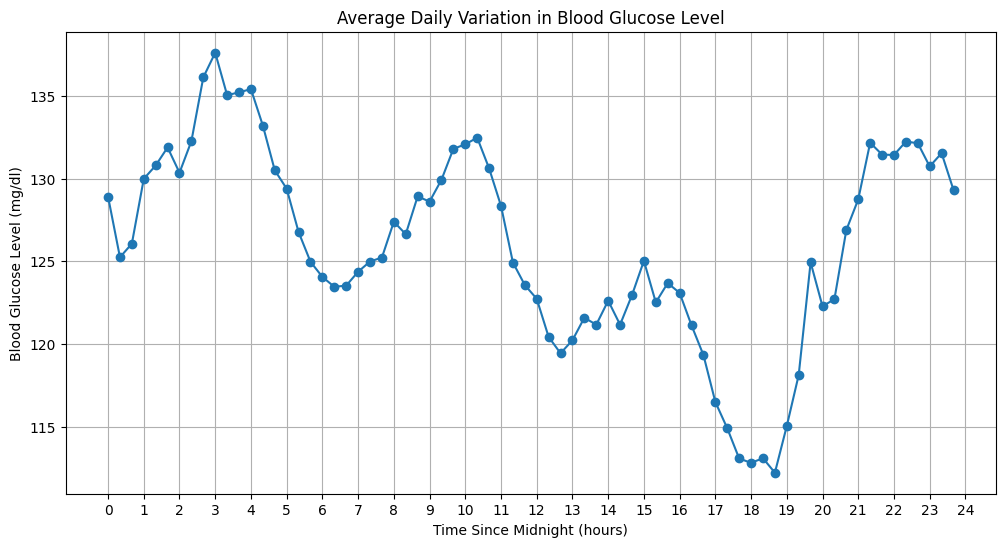

In [2]:

# Figure 1

hours = range(24)
intervals = (0, 20, 40)
avg = []
times = [ x/3 for x in range(72)]
for i in hours:
    for j in intervals:
        avg.append(df[(df["date_fmt"].dt.hour == i) & (df["date_fmt"].dt.minute >= j) & (df["date_fmt"].dt.minute <= j+19)]["bgl"].mean())
plt.figure(figsize=(12, 6))
plt.title("Average Daily Variation in Blood Glucose Level")
plt.plot(times, avg, marker="o")
plt.xlabel('Time Since Midnight (hours)')
plt.xticks(range(0, 25), range(25))
plt.ylabel('Blood Glucose Level (mg/dl)')
plt.grid(True)
plt.show()

**Fig. 1: Average BGL during different times of day (averaged across both patients, line, 20m intervals).**

This visualization shows the average blood glucose level of both patients, calculated in 20 minute intervals. We can see that blood glucose tends to fall overall over the course of the day, though it does spike significantly around common meal times (around 8-10 for breakfast, 1-3 for lunch, and 6-8 for dinner). Strangely, blood glucose seems to also spike and stay elevated when the patients are sleeping, but I'm not sure why this is the case.

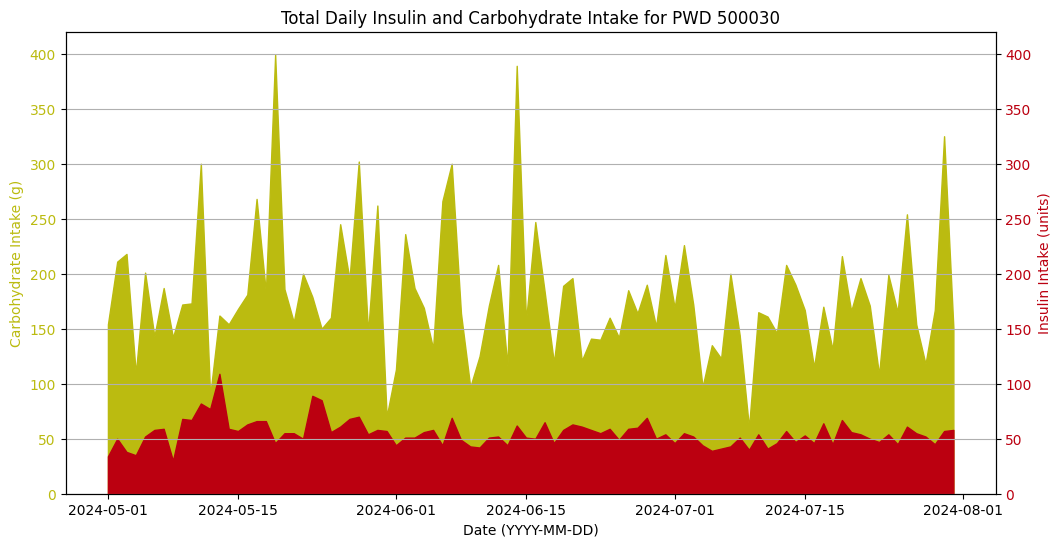

In [3]:
# Figure 2
p1f = df[(df["affects_fob"] == True) & (df["pwd"] == "500030")]
p1i = df[(df["affects_iob"] == True) & (df["pwd"] == "500030")]
a = p1f["food_g"].groupby(p1f["date_fmt"].dt.floor('d')).sum().reset_index(0)
b = p1i["dose_units"].groupby(p1i["date_fmt"].dt.floor('d')).sum().reset_index(0)

fig, ax1 = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(12)
color = '#bbbb10'
ax1.set_title("Total Daily Insulin and Carbohydrate Intake for PWD 500030")
ax1.set_xlabel('Date (YYYY-MM-DD)')
ax1.set_ylabel('Carbohydrate Intake (g)', color=color)
ax1.stackplot(a["date_fmt"], a["food_g"], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 420)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = '#bb0010'
ax2.set_ylabel('Insulin Intake (units)', color=color)  # we already handled the x-label with ax1
ax2.stackplot(b["date_fmt"], b["dose_units"], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 420)
ax2.grid(True)



**Fig. 2: Total daily insulin and carbohydrate intake.**

I took this measurement because I wasn't sure if there was some sort of medical dependency between these variables (do you need more insulin if you take in more carbs?). From the looks of it that doesn't seem to be the case, as carb intake can vary wildly while insulin intake stays roughly consistent (around 50u per day for this patient), with the exception of a few outliers around the middle of May.

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. What causes the extreme fluctuations in BGL for T1D patients? I thought that T1D only meant that it was much easier to get hyperglycemia, but from the looks of it T1D seems to result in both higher highs and lower lows for BGL. Why is that?
2. How much does T1D affect one's day-to-day life? What sorts of choices/actions do you take on a day-to-day basis are motivated by your T1D?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`